In [17]:
import pandas as pd

In [38]:
names = ["cluster_" + str(i) for i in range(0,12)]
top100_cluster = pd.read_csv("top_100_Genes_orderd.csv", sep=",", header=0, names=names, index_col=False)
# top100_cluster.names = names
top100_cluster.head()

/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_41471/3748161955.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  top100_cluster = pd.read_csv("top_100_Genes_orderd.csv", sep=",", header=0, names=names, index_col=False)


,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
0,ENSG00000211459,ENSG00000277048,ENSG00000210082,ENSG00000202198,ENSG00000234741,ENSG00000198804,ENSG00000251562,ENSG00000276402,ENSG00000281891,ENSG00000244734,ENSG00000078674,ENSG00000230228
1,ENSG00000210082,ENSG00000276402,ENSG00000198804,ENSG00000263934,ENSG00000255717,ENSG00000198712,ENSG00000258082,ENSG00000159720,ENSG00000269893,ENSG00000169429,ENSG00000250903,ENSG00000105698
2,ENSG00000198727,ENSG00000210082,ENSG00000212907,ENSG00000198938,ENSG00000202354,ENSG00000198938,ENSG00000198804,ENSG00000151176,ENSG00000204472,ENSG00000130066,ENSG00000145819,ENSG00000043462
3,ENSG00000198804,ENSG00000274224,ENSG00000135097,ENSG00000156508,ENSG00000275757,ENSG00000198886,ENSG00000167613,ENSG00000231752,ENSG00000177954,ENSG00000281181,ENSG00000241721,ENSG00000224397
4,ENSG00000212907,ENSG00000211459,ENSG00000226738,ENSG00000100678,ENSG00000252316,ENSG00000087086,ENSG00000008130,ENSG00000259823,ENSG00000210112,ENSG00000215182,ENSG00000135220,ENSG00000205622


,eid,BIOLOGICAL_PROCESS
0,ENSG00000198216,KW-0406~Ion transport
1,ENSG00000102001,KW-0813~Transport
2,ENSG00000081248,KW-0813~Transport
3,ENSG00000215522,KW-0421~Lactation
4,ENSG00000223680,KW-0421~Lactation


,eid,MOLECULAR_FUNCTION
0,ENSG00000054179,KW-0378~Hydrolase
1,ENSG00000101017,KW-0675~Receptor
2,ENSG00000123146,KW-0675~Receptor
3,ENSG00000170312,KW-0723~Serine/threonine-protein kinase
4,ENSG00000164045,KW-0904~Protein phosphatase


In [109]:
names = ["eid", "MOLECULAR_FUNCTION"]
gene2molfun = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_KW_MOLECULAR_FUNCTION.txt", sep="\t", names=names)


names = ["eid", "BIOLOGICAL_PROCESS"]
gene2bio = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_KW_BIOLOGICAL_PROCESS.txt", sep="\t", names=names)


names = ["eid", "GENE_NAME"]
eid2gene_name = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2DAVID_GENE_NAME.txt", sep="\t", names=names)


names = ["eid", "DISGENET"]
eid2disgene = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2DISGENET.txt", sep="\t", names=names)



names = ["eid", "CELLULAR_COMPONENT"]
eid2cell_func = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_KW_CELLULAR_COMPONENT.txt", sep="\t", names=names)
eid2cell_func.head()

names = ["eid", "SEQ_FEATURE"]
eid2seq_feat = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_SEQ_FEATURE.txt", sep="\t", names=names)
eid2seq_feat.head()



,eid,SEQ_FEATURE
0,ENSG00000158485,DOMAIN:MHC class I-like antigen recognition-like
1,ENSG00000158485,TRANSMEM:Helical
2,ENSG00000116824,DOMAIN:Ig-like C2-type
3,ENSG00000116824,REGION:CD58 binding region 1
4,ENSG00000198851,DOMAIN:Immunoglobulin subtype 2


In [100]:
eid2seq_feat.columns

Index(['eid', 'SEQ_FEATURE'], dtype='object')

In [124]:
def create_knowledgebase(david_list, ecg_dfs):
    """Join metadata to different cluster of genes"""
    out_dfs = {}
    for cl in ecg_dfs.columns:
        df = pd.DataFrame(ecg_dfs[cl])
        df.columns = ["eid"]
        for ddf in david_list:
            df = df.merge(ddf, how="left", left_on='eid', right_on='eid')
        df.drop_duplicates().to_csv(cl + "_metadata.tsv", sep="\t", index=False)
        out_dfs[cl] = df
    return out_dfs


mdfs = create_knowledgebase([gene2molfun, gene2bio, eid2gene_name,eid2cell_func],top100_cluster)
mdfs

{'cluster_0':                  eid   MOLECULAR_FUNCTION                BIOLOGICAL_PROCESS   
 0    ENSG00000211459  KW-0238~DNA-binding             KW-0804~Transcription  \
 1    ENSG00000211459  KW-0238~DNA-binding             KW-0804~Transcription   
 2    ENSG00000211459  KW-0238~DNA-binding             KW-0804~Transcription   
 3    ENSG00000211459  KW-0238~DNA-binding  KW-0805~Transcription regulation   
 4    ENSG00000211459  KW-0238~DNA-binding  KW-0805~Transcription regulation   
 ..               ...                  ...                               ...   
 558  ENSG00000265972                  NaN  KW-0805~Transcription regulation   
 559  ENSG00000166913                  NaN    KW-0945~Host-virus interaction   
 560  ENSG00000166913                  NaN    KW-0945~Host-virus interaction   
 561  ENSG00000166913                  NaN    KW-0945~Host-virus interaction   
 562  ENSG00000229701                  NaN                               NaN   
 
                         

<AxesSubplot: title={'center': 'cluster_0'}, xlabel='GENE_NAME', ylabel='BIOL. PROC. COUNT'>

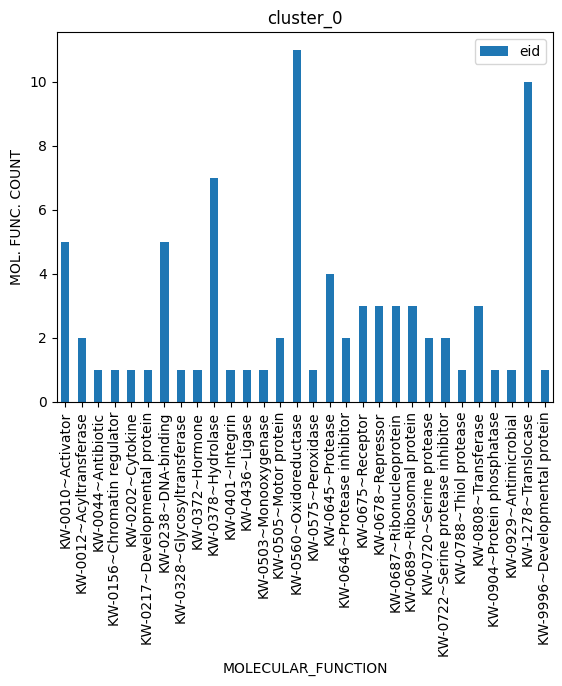

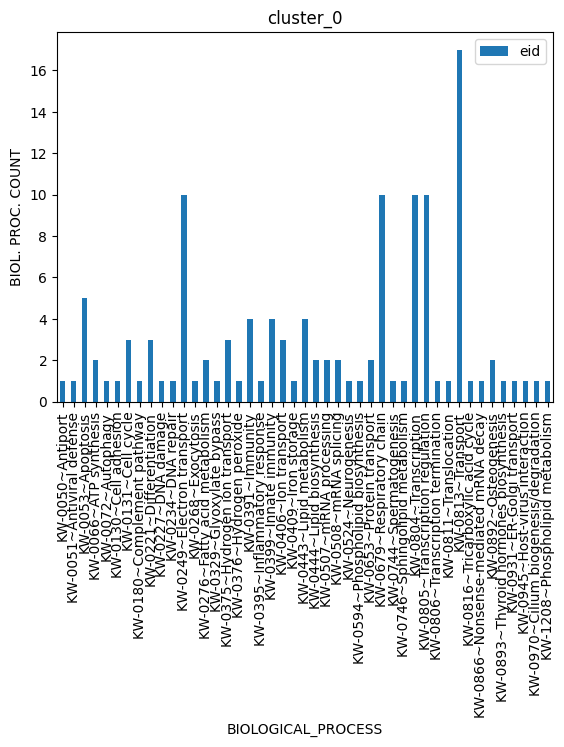

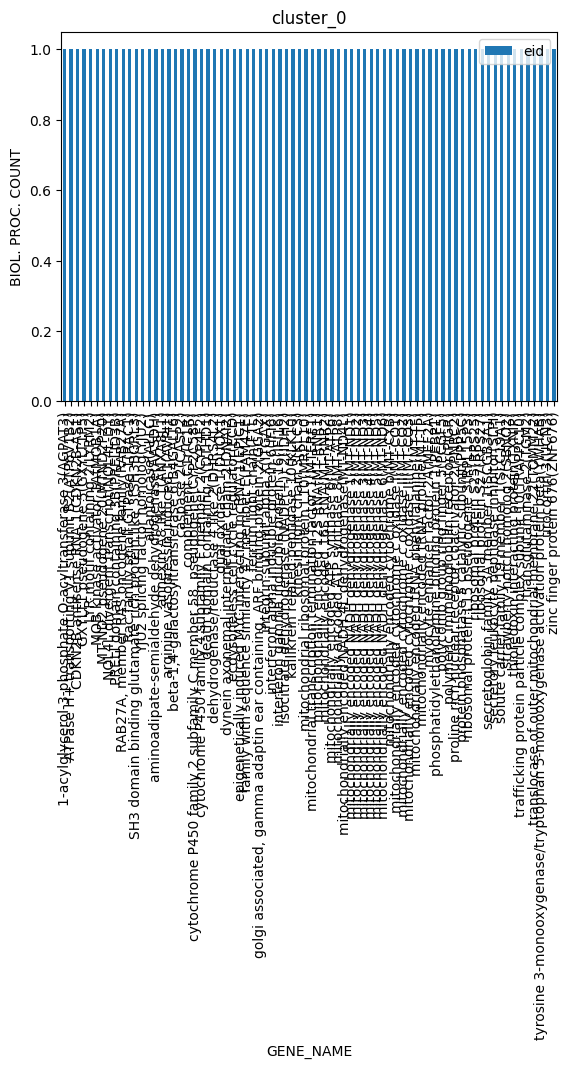

In [142]:
mdfs['cluster_0'][['eid', 'MOLECULAR_FUNCTION']].drop_duplicates().groupby(['MOLECULAR_FUNCTION']).count().plot(kind="bar", title="cluster_0", ylabel="MOL. FUNC. COUNT")
mdfs['cluster_0'][['eid', 'BIOLOGICAL_PROCESS']].drop_duplicates().groupby(['BIOLOGICAL_PROCESS']).count().plot(kind="bar", title="cluster_0", ylabel="BIOL. PROC. COUNT")



In [61]:
[gene2molfun]
gene2molfun

,eid,MOLECULAR_FUNCTION
0,ENSG00000054179,KW-0378~Hydrolase
1,ENSG00000101017,KW-0675~Receptor
2,ENSG00000123146,KW-0675~Receptor
3,ENSG00000170312,KW-0723~Serine/threonine-protein kinase
4,ENSG00000164045,KW-0904~Protein phosphatase
...,...,...
26614,ENSG00000288684,KW-0378~Hydrolase
26615,ENSG00000286001,KW-0560~Oxidoreductase
26616,ENSG00000255508,KW-0694~RNA-binding
26617,ENSG00000269547,KW-0030~Aminoacyl-tRNA synthetase


In [40]:
top100_cluster.shape

(100, 12)